# micrograd exercises

1. watch the [micrograd video](https://www.youtube.com/watch?v=VMj-3S1tku0) on YouTube
2. come back and complete these exercises to level up :)

## section 1: derivatives

In [ ]:
# here is a mathematical expression that takes 3 inputs and produces one output
from math import sin, cos

def f(a, b, c):
  return -a**3 + sin(3*b) - 1.0/c + b**2.5 - a**0.5

print(f(2, 3, 4))

6.336362190988558


In [ ]:
# write the function df that returns the analytical gradient of f
# i.e. use your skills from calculus to take the derivative, then implement the formula
# if you do not calculus then feel free to ask wolframalpha, e.g.:
# https://www.wolframalpha.com/input?i=d%2Fda%28sin%283*a%29%29%29

def gradf(a, b, c):
  L1 = f(a, b, c)
  h = 0.000001

  a_perturbed = a + h
  L2 = f(a_perturbed, b, c)
  dfda = (L2 - L1) / h

  b_perturbed = b + h
  L2 = f(a, b_perturbed, c)
  dfdb = (L2 - L1) / h

  c_perturbed = c + h
  L2 = f(a, b, c_perturbed)
  dfdc = (L2 - L1) / h

  return [dfda, dfdb, dfdc] # todo, return [df/da, df/db, df/dc]

# expected answer is the list of
ans = [-12.353553390593273, 10.25699027111255, 0.0625]
yours = gradf(2, 3, 4)
for dim in range(3):
  ok = 'OK' if abs(yours[dim] - ans[dim]) < 1e-5 else 'WRONG!'
  print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {yours[dim]}")


OK for dim 0: expected -12.353553390593273, yours returns -12.353559348809995
OK for dim 1: expected 10.25699027111255, yours returns 10.256991666679482
OK for dim 2: expected 0.0625, yours returns 0.062499984743169534


In [ ]:
# now estimate the gradient numerically without any calculus, using
# the approximation we used in the video.
# you should not call the function df from the last cell

# -----------

a = 2
df_da = -3*a**2 - 0.5*a**(-0.5)

b = 3
df_db =3*cos(3*b) + 2.5*b**1.5

c = 4
df_dc = c**-2

numerical_grad = [df_da, df_db, df_dc] # TODO
# -----------

for dim in range(3):
  ok = 'OK' if abs(numerical_grad[dim] - ans[dim]) < 1e-5 else 'WRONG!'
  print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {numerical_grad[dim]}")


OK for dim 0: expected -12.353553390593273, yours returns -12.353553390593273
OK for dim 1: expected 10.25699027111255, yours returns 10.25699027111255
OK for dim 2: expected 0.0625, yours returns 0.0625


In [ ]:
# there is an alternative formula that provides a much better numerical
# approximation to the derivative of a function.
# learn about it here: https://en.wikipedia.org/wiki/Symmetric_derivative
# implement it. confirm that for the same step size h this version gives a
# better approximation.

# -----------


import math
def gradf(a, b, c):
    h = 0.000001

    L1 = -(a+h)**3 + math.sin(3*b) - 1.0/c + b**2.5 - (a+h)**0.5
    L2 = -(a-h)**3 + math.sin(3*b) - 1.0/c + b**2.5 - (a-h)**0.5
    df_da = (L1 - L2) / (2*h)

    L1 = -a**3 + math.sin(3*(b+h)) - 1.0/c + (b+h)**2.5 - a**0.5
    L2 = -a**3 + math.sin(3*(b-h)) - 1.0/c + (b-h)**2.5 - a**0.5
    df_db = (L1 - L2) / (2*h)

    L1 = -a**3 + math.sin(3*b) - 1.0/(c+h) + b**2.5 - a**0.5
    L2 = -a**3 + math.sin(3*b) - 1.0/(c-h) + b**2.5 - a**0.5
    df_dc = (L1 - L2) / (2*h)

    return [df_da, df_db, df_dc]

h = 0.000001
numerical_grad2 = gradf(2, 3, 4)


ans = [-12.353553390593273, 10.25699027111255, 0.0625]
for dim in range(3):
    ok = 'OK' if abs(numerical_grad2[dim] - ans[dim]) < 1e-5 else 'WRONG!'
    print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {numerical_grad2[dim]}")

OK for dim 0: expected -12.353553390593273, yours returns -12.353553391353245
OK for dim 1: expected 10.25699027111255, yours returns 10.25699027401572
OK for dim 2: expected 0.0625, yours returns 0.06250000028629188


## section 2: support for softmax

In [ ]:
# Value class starter code, with many functions taken out
from math import exp, log
import numpy as np
class Value:

  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other): # exactly as in the video
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')

    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward

    return out

  def __mul__(self, other) :
     #print(self.data,'self')
     #print(other.data,'other')
     other = other if isinstance(other, Value) else Value(other)
     out = Value(self.data * other.data, (self, other), '*')

     def _backward():
        self.grad += other.data * out.grad
        other.grad += self.data * out.grad
     out._backward = _backward
     return out

  #def __pow__(self, other):
  #  assert isinstance(other, (int, float)), "only supporting int/float powers for now"
  #  out = Value(self.data**other, (self,), f'**{other}')

  def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            self.grad += (other * self.data**(other-1)) * out.grad
        out._backward = _backward

        return out

  #def __truediv__(self, other): # self / other
  #  return self * other**-1
  def log(self):
    out = Value(log(self.data), (self,), 'log')

    def _backward():
      self.grad += (1/self.data) * out.grad
    out._backward = _backward
    return out

  def __truediv__(self, other):
    other = Value(other) if not isinstance(other, Value) else other
    return self * other**-1

  def __rtruediv__(self, other): # other / self
    return other * self**-1

  def __neg__(self):
    return self * -1

  def __sub__(self, other):
    return self + (-other)

  def __radd__(self, other): # other + self
    return self + other


  def __rmul__(self,other):
    return self * other

  def exp(self):
    x = self.data
    out = Value(exp(x), (self,) , 'exp')

    def _backward():
      self.grad += out.data * out.grad
    out._backward = _backward

    return out

  def tanh(self):
    x = self.data
    t = (exp(2*x) - 1)/(exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward
    return out


  def backward(self): # exactly as in video

    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

In [ ]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})

    for n in nodes:
        dot.node(name=str(id(n)), label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

In [ ]:
# without referencing our code/video __too__ much, make this cell work
# you'll have to implement (in some cases re-implemented) a number of functions
# of the Value object, similar to what we've seen in the video.
# instead of the squared error loss this implements the negative log likelihood
# loss, which is very often used in classification.

# this is the softmax function
# https://en.wikipedia.org/wiki/Softmax_function
def softmax(logits):
  counts = [logit.exp() for logit in logits]
  denominator = sum(counts)
  print(counts)
  print(denominator)
  out = [c / denominator for c in counts]
  return out

# this is the negative log likelihood loss function, pervasive in classification
logits = [Value(0.0), Value(3.0), Value(-2.0), Value(1.0)]
probs = softmax(logits)
loss = -probs[3].log() # dim 3 acts as the label for this input example
loss.backward()
print(loss.data)

ans = [0.041772570515350445, 0.8390245074625319, 0.005653302662216329, -0.8864503806400986]
for dim in range(4):
  ok = 'OK' if abs(logits[dim].grad - ans[dim]) < 1e-5 else 'WRONG!'
  print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {logits[dim].grad}")


[Value(data=1.0), Value(data=20.085536923187668), Value(data=0.1353352832366127), Value(data=2.718281828459045)]
Value(data=23.939154034883327)
2.1755153626167147
OK for dim 0: expected 0.041772570515350445, yours returns 0.041772570515350445
OK for dim 1: expected 0.8390245074625319, yours returns 0.8390245074625319
OK for dim 2: expected 0.005653302662216329, yours returns 0.005653302662216329
OK for dim 3: expected -0.8864503806400986, yours returns -0.8864503806400986


## section 3: support Matrix

### torch

In [ ]:
# verify the gradient using the torch library
# torch should give you the exact same gradient
import torch

# Define the MLP class using PyTorch modules
class MLP(torch.nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim):
        super(MLP, self).__init__()
        # Define hidden layers
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(input_dim, hidden_dims[0]),

            torch.nn.Linear(hidden_dims[0], hidden_dims[1]),

            torch.nn.Linear(hidden_dims[1], output_dim),
        )

    def forward(self, x):
        return self.layers(x)

# Define data
xs = torch.tensor([[4.0, 6.0, -2.0],
                   [6.0, -2.0, 1.0],
                   [1.0, 2.0, 2.0],
                   [2.0, 2.0, -2.0]], dtype=torch.float)

ys = torch.tensor([2.0, -2.0, -2.0, 2.0], dtype=torch.float)

# Create an instance of the MLP
n = MLP(3, [4, 4], 1)  # Input dim 3, hidden dims [4, 4], output dim 1

# Calculate predictions
ypred = [n(x.unsqueeze(0)) for x in xs]  # Unsqueeze for batch dimension
ypred = torch.stack(ypred)  # Combine predictions into a tensor

# Define loss function (mean squared error)
loss_fn = torch.nn.MSELoss()

# Calculate loss
loss = loss_fn(ypred, ys)

# Perform backpropagation
loss.backward()

# Print the loss (optional)
print(loss.item())


4.184131145477295


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [ ]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})

    for n in nodes:
        dot.node(name=str(id(n)), label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

In [ ]:
import random

class Neuron:

  def __init__(self, nin):
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b = Value(random.uniform(-1,1))

  def __call__(self, x):
    # w * x + b
    act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
    out = act.tanh()
    return out

  def parameters(self):
    return self.w + [self.b]

class Layer:

  def __init__(self, nin, nout):
    self.neurons = [Neuron(nin) for _ in range(nout)]

  def __call__(self, x):
    outs = [n(x) for n in self.neurons]
    return outs

  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()]


class MLP:

  def __init__(self, nin, nouts):
    sz = [nin] + nouts
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x

  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]

### TinyNet

In [ ]:
xs = Value([
    [4.0, 6.0, -2.0],
    [6.0, -2.0, 1.0],
    [1.0, 2.0, 2.0],
    [2.0, 2.0, -2.0],])
ys = [Value(2.0), Value(-2.0), Value(-2.0), Value(2.0)]
n = MLP(3, [4, 4, 1])

In [ ]:
ypred = [n(x) for x in xs.data]
ypred = [ypred[i][0] for i in range(len(ypred)) ]

loss = sum((yout - ygt)**2 for ygt,yout in zip(ys,ypred))
loss

Value(data=9.598926110236963)

In [ ]:
loss.backward()

In [ ]:
for p in n.parameters():
  p.data += -0.01 * p.grad

In [ ]:
ypred = [n(x) for x in xs.data]
ypred = [ypred[i][0] for i in range(len(ypred)) ]

loss = sum((yout - ygt)**2 for ygt,yout in zip(ys,ypred))
loss

Value(data=7.02348086261205)

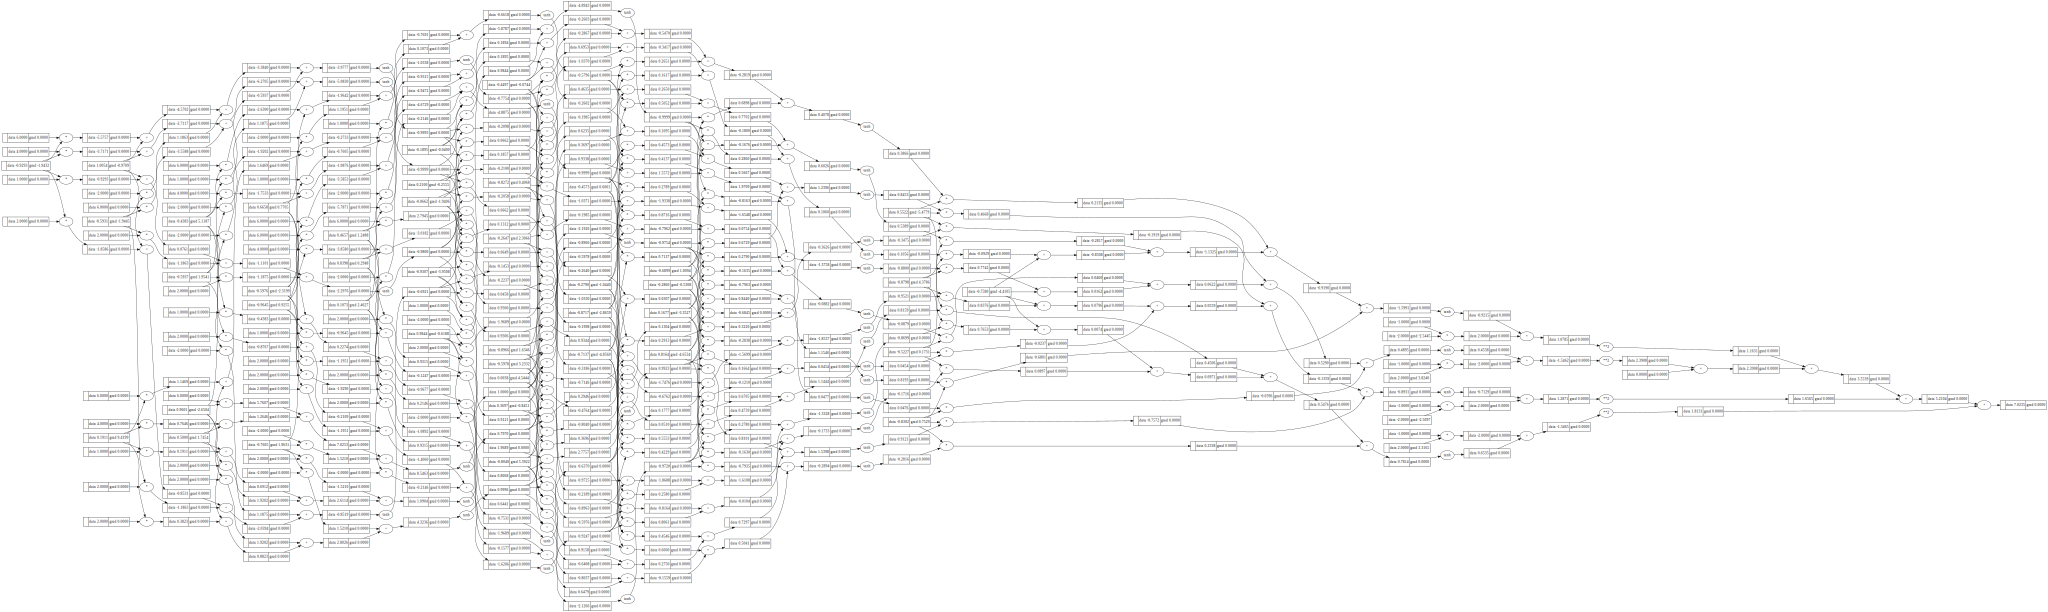

In [ ]:
draw_dot(loss)